# Pymaceuticals Inc.
---

### Analysis

- In this study, approximately 250 mice were tested with 10 different Drug Regimen. The lab subjects were evenly distributed and randomly selected among sex and weight. 
- Of these, Capomulin and Ramicane demonstrated the best results. They had the smallest Average Tumor Sizes (~40 vs the placebo's 54 mm3) and low Standard Deviation. In other words, they routinely shrunk the mice's tumors more than the competition. 
- It is important to note, there was a strong correlation (0.84) between the size of the tumors and weight of the mice tested with Capomulin. As we look to proceed to larger test subjects, we may need to revisit the proper dosage to ensure efficacy.
 

In [332]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mergeDf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mergeDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
mice = mergeDf["Mouse ID"].unique()
mice_count = len(mergeDf["Mouse ID"].unique())
print(mice_count)

249


In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mergeDf[mergeDf.duplicated(subset=['Mouse ID', 'Timepoint'], keep =False )]

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dataDf = mergeDf.loc[mergeDf["Mouse ID"] != "g989"]
dataDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Checking the number of mice in the clean DataFrame.
mice_clean = dataDf["Mouse ID"].unique()
mice_count_clean = len(mice_clean)
print(mice_count_clean)

248


## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupDf = dataDf.groupby("Drug Regimen")
mean_vol = groupDf["Tumor Volume (mm3)"].mean()
med_vol = groupDf["Tumor Volume (mm3)"].median()
var_vol = groupDf["Tumor Volume (mm3)"].var()
std_vol = groupDf["Tumor Volume (mm3)"].std()
sem_vol = groupDf["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summaryDf = pd.DataFrame(
{"Mean Tumor Volume": mean_vol,
"Median Tumor Volume":med_vol,
"Tumor Volume Variance":var_vol,
"Tumor Volume Std. Dev.":std_vol,
"Tumor Volume Std. Err.":sem_vol})

summaryDf


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggDf = groupDf.agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]}) 
aggDf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Figure size 2000x400 with 0 Axes>

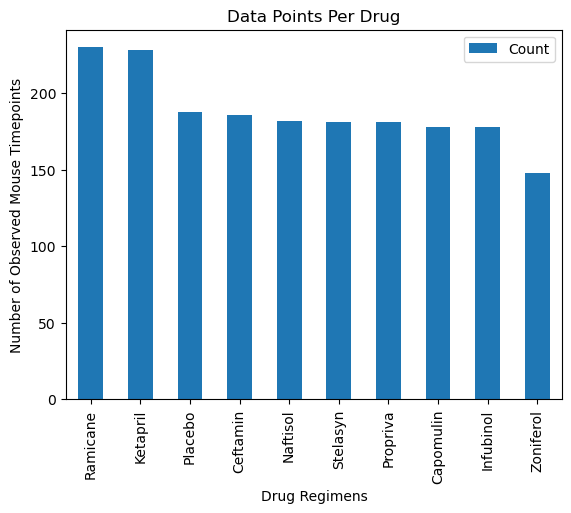

<Figure size 2000x400 with 0 Axes>

In [288]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimentDf = pd.DataFrame(
{"Drug Regimens": dataDf["Drug Regimen"].unique(),
"Count":groupDf["Drug Regimen"].count()})
regimentDf = regimentDf.sort_values("Count", ascending = False)
regimentDf.plot("Drug Regimens","Count", kind = 'bar')

#title and axis labels
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Data Points Per Drug")

#formatting
plt.figure(figsize=(20,4))

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

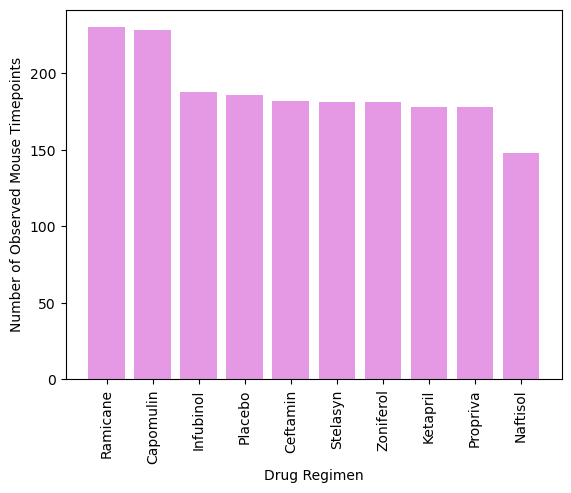

In [289]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
labels = dataDf["Drug Regimen"].unique()
drug_counts = groupDf["Drug Regimen"].count()

#graph variables
tick_loc = np.arange(len(drug_counts))
x_axis = np.arange(len(drug_counts))

#x ticks
plt.xticks(tick_loc, labels, rotation=90)

plt.bar(x_axis, drug_counts.sort_values(ascending=False), color='m', align = "center", alpha =.4)

#labels 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

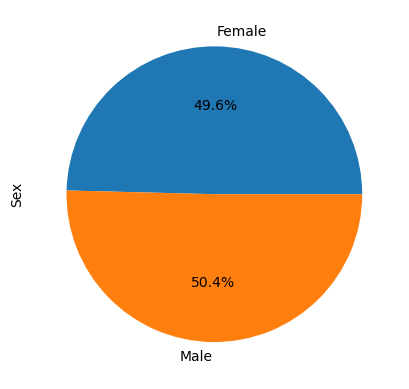

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989"]

#groupby where data is rows per sex are counted
sex_count = mouse_metadata.groupby("Sex")["Sex"].count()
sex_count.plot(kind="pie", y ="Sex", autopct="%.1f%%")
plt.show()


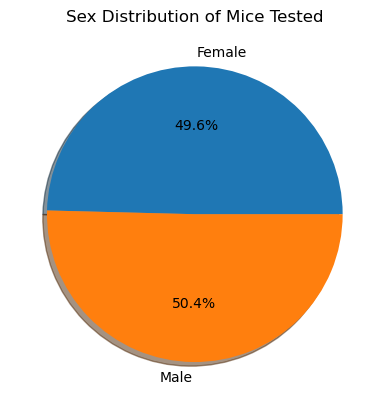

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = sex_count
labels = ["Female","Male"]
plt.pie(values, labels=labels, autopct = "%1.1f%%", shadow=True)
plt.title("Sex Distribution of Mice Tested")
plt.show()

## Quartiles, Outliers and Boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
sortedDf = dataDf.loc[dataDf["Drug Regimen"].isin(top_drugs)]               

# Start by getting the last (greatest) timepoint for each mouse
maxtimes = pd.DataFrame(sortedDf.groupby("Mouse ID")["Timepoint"].max())\
.reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_df = pd.merge(sortedDf,maxtimes,on="Mouse ID", how="inner")
merged_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [285]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in top_drugs:
    drug_df = merged_max_df.loc[merged_max_df["Drug Regimen"] == drug]
    
    # add subset 
    vol_df = drug_df.loc[drug_df["Timepoint"] == drug_df["Max Timepoint"]]
    max_tumorDf = (vol_df["Tumor Volume (mm3)"])
    tumor_vol.append(max_tumorDf)
    
# Determine outliers using upper and lower bounds
    quartiles = max_tumorDf.quantile([.25,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers_df = vol_df.loc[(vol_df["Tumor Volume (mm3)"] > upper_bound)\
                              |(vol_df["Tumor Volume (mm3)"] < lower_bound)]["Tumor Volume (mm3)"]
    print("For " + str(drug) +":, Upper bound:"+ str(upper_bound))
    print("Lower bound:"+ str(lower_bound))
    if len(outliers_df) != 0: 
        print("Potential outliers for " + str(drug) + " are " + str(outliers_df))
    else:
        print("There are no potential outliers for " + str(drug))
    print("\n")


For Capomulin:, Upper bound:51.83201549
Lower bound:20.70456164999999
There are no potential outliers for Capomulin


For Ramicane:, Upper bound:54.30681135
Lower bound:17.912664470000003
There are no potential outliers for Ramicane


For Infubinol:, Upper bound:82.74144559000001
Lower bound:36.83290494999999
Potential outliers for Infubinol are 526    36.321346
Name: Tumor Volume (mm3), dtype: float64


For Ceftamin:, Upper bound:87.66645829999999
Lower bound:25.355449580000002
There are no potential outliers for Ceftamin




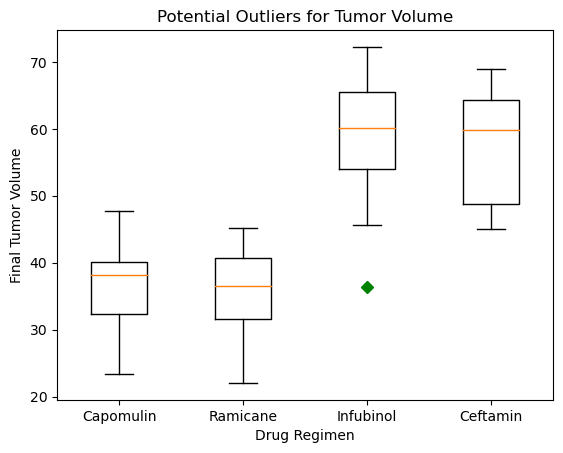

In [311]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, axs = plt.subplots()

axs.set_title("Potential Outliers for Tumor Volume")
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")

axs.boxplot(tumor_vol, 0, 'gD')
axis.boxplot(tumor_vol)
plt.xticks([1,2,3,4],top_drugs)
plt.show()

## Line and Scatter Plots

In [312]:
cap_mice = drug_df.loc[drug_df["Drug Regimen"]=="Capomulin"]
cap_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint


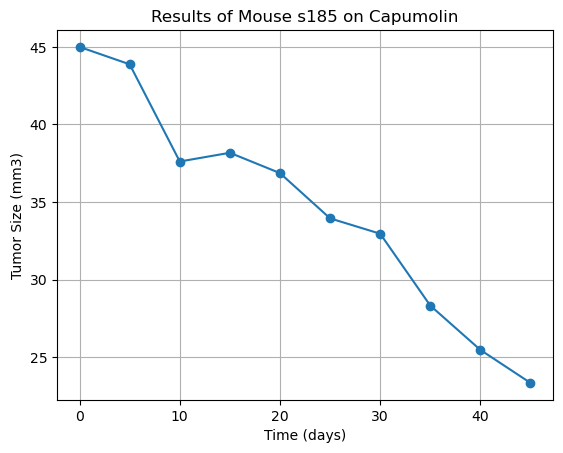

In [320]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mice = sortedDf.loc[sortedDf["Drug Regimen"]=="Capomulin"]
cap_mice.head()
cap_s185 = cap_mice.loc[cap_mice["Mouse ID"]=="s185"]
plt.plot(cap_s185["Timepoint"], cap_s185["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("Time (days)")
plt.grid()
plt.ylabel("Tumor Size (mm3)")
plt.title("Results of Mouse s185 on Capumolin")
plt.show()

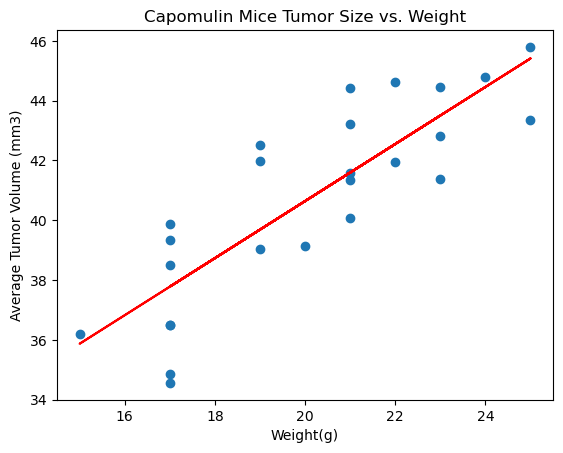

The correlation between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55


In [340]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_group = cap_mice.groupby("Mouse ID")
weight = cap_group["Weight (g)"].first()
avg_tum = cap_group["Tumor Volume (mm3)"].mean()
plt.scatter(weight, avg_tum)

plt.title("Capomulin Mice Tumor Size vs. Weight")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_cor = st.pearsonr(weight, avg_tum)
cap_cor = round(cap_cor[0],2)


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tum)
reg = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight, reg,"r")

plt.show()
print("The correlation between mouse weight and average tumor volume is " + str(cap_cor))
print(line_eq)